<a href="https://colab.research.google.com/github/abulhasanat/MachineLearning/blob/master/Classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the IMDB dataset

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.

In [2]:
train_data[1][0:10]

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463]

In [3]:
train_labels[2]

0

Because we’re restricting ourself to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [4]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here’s how we can quickly decode one of these reviews back to English
words:

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Encoding the integer sequences into a binary matrix

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

vectorize our labels

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The model definition

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Configuring the optimizer

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

Using custom losses and metrics

In [0]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

Setting aside a validation set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training our model

In [23]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.5244 - acc: 0.7807 - val_loss: 0.3933 - val_acc: 0.8660
Epoch 2/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.3133 - acc: 0.9026 - val_loss: 0.3098 - val_acc: 0.8862
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.2285 - acc: 0.9280 - val_loss: 0.2868 - val_acc: 0.8862
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1812 - acc: 0.9419 - val_loss: 0.2814 - val_acc: 0.8857
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.1431 - acc: 0.9561 - val_loss: 0.2924 - val_acc: 0.8832
Epoch 6/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.1191 - acc: 0.9641 - val_loss: 0.2912 - val_acc: 0.8854
Epoch 7/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.0960 - acc: 0.9725 - val_loss: 0.3256 - val_ac

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Plotting the training and validation loss

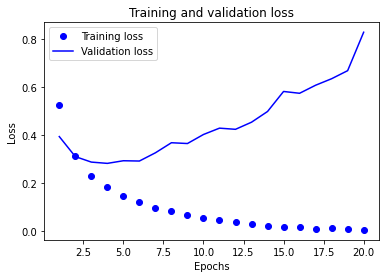

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting the training and validation accuracy

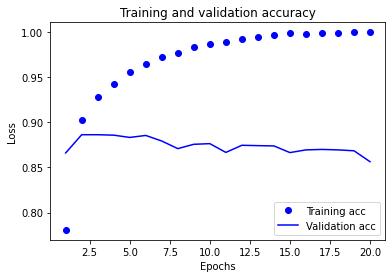

In [45]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Retraining a model from scratch

In [38]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.4818 - accuracy: 0.8161
Epoch 2/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.2766 - accuracy: 0.9079
Epoch 3/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.2126 - accuracy: 0.9248
Epoch 4/4
25000/25000 [==============================] - 2s 92us/step


In [39]:
results

[0.2899474654197693, 0.8842800259590149]

Using a trained network to generate predictions on new data

In [40]:
model.predict(x_test)

array([[0.2076195 ],
       [0.99942756],
       [0.8505604 ],
       ...,
       [0.09949525],
       [0.06255086],
       [0.54957885]], dtype=float32)